### Linear Algebra, Calculus, and Gradient Descent

#### Objectives
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">

It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Recommendation engines are able to make much more sophisticated recommendations by using linear algebra in conjunction with user and content data.

<img src = "./resources/netflix.png">

### Group 1: using code to explain vectors and scalars

In [1]:
import numpy as np

<img src="https://github.com/learn-co-students/nyc-mhtn-ds-031119-lectures/raw/404d31eb8d11bc044187c99b487f4f46082e8f3c/Mod_3/LinAlgebra/resources/linal_types.png" width=450>

## Vectors

An array with magnitude and direction. The coordinates of a vector represent where the tip of the vector would be if you travelled from the origin.


Operations with vectores
Assume

$ \vec{v} = \begin{bmatrix}v_{1} \\v_{2}\end{bmatrix} $


$ \vec{w} = \begin{bmatrix}w_{1} \\w_{2}\end{bmatrix} $

$ \vec{v} + \vec{w} = \begin{bmatrix}v_{1} + w_{1} \\v_{2} + w_{2}\end{bmatrix} $

What is happening graphically? Let's look at an example:


In [ ]:

import numpy as np
v = np.array([2, 4])
w = np.array([3, 2])
v + w

#### Scalars

Have magnitude only. Can be multiplied by a vector or matrix to create a change in **scale** and/or direction.

What scalars would you need to change the direction of a vector?

In [ ]:
v * 4

### Group 2: Desmos to explore vectors and scalars

[link to fun desmos interaction](https://www.desmos.com/calculator/yovo2ro9me)

To capture the relationship between (*a, b*), to capture the _direction_ rather than the length, what mathematical concept would you use?

### Group 3: Youtube vid

[Link to good video on scalars and vectors](https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Slide break!

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

**Good video on details of gradient decent**

https://www.youtube.com/watch?v=sDv4f4s2SB8

### Gradient Descent


[slide deck!](https://docs.google.com/presentation/d/1i7FTqyjxWESFVYe6T5BYDzmqq0x7rI2c0va1Tn6WxbM/edit?usp=sharing)

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

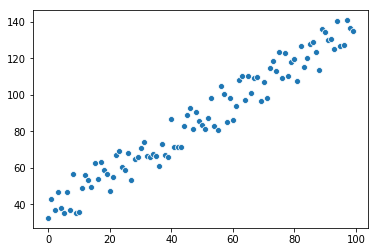

In [5]:
sns.scatterplot(x=x[:, 1], y=y)

In [6]:
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))])

Iteration 0 | Cost: 172.737517
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 175.621152
[1.99394751 1.58155606]
Iteration 2 | Cost: 3869.997701
[2.05765394 0.03247465]
Iteration 3 | Cost: 3750521.811272
[ 2.8875186  49.31594669]
Iteration 4 | Cost: 3802640576.680594
[  -20.68623404 -1520.03416877]
Iteration 5 | Cost: 3855658503447.692383
[  732.80405799 48451.89576441]
Iteration 6 | Cost: 3909415801365737.000000
[  -23257.34586982 -1542777.47135299]
Iteration 7 | Cost: 3963922607505357312.000000
[  740650.94242476 49125884.5550438 ]
Iteration 8 | Cost: 4019189371671232905216.000000
[-2.35840676e+07 -1.56428911e+09]
Iteration 9 | Cost: 4075226689534492080603136.000000
[7.50974881e+08 4.98108178e+10]
Iteration 10 | Cost: 4132045304495978040679989248.000000
[-2.39128897e+10 -1.58609912e+12]
Iteration 11 | Cost: 4189656109745781880728313659392.000000
[7.61445303e+11 5.05053023e+13]
Iteration 12 | Cost: 4248070150351676044262300740222976.000000
[-2.42462938e+13 -1.60821321e+15]
Iteration 13 |

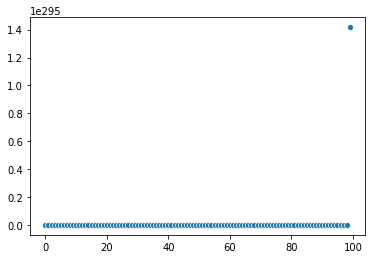

In [8]:
numIterations= 100
alpha = 0.01
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numIterations)